In [1]:
import numpy as np
from scipy.linalg import eigh, eig
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
def m_dist2(x1, x2, K):
    return (x2 - x1).T @ K @ (x2 - x1)

In [14]:
n = 100
p = 30
r = 2

In [32]:
X = np.random.normal(0, 1, size=(n, p))
Astar = np.random.normal(0, 1, size=(p, r)) / np.sqrt(p)
Kstar = Astar @ Astar.T

In [33]:
transition_matrices = [np.zeros((n - 1, n - 1)) for _ in range(n)]
for i, j, k in [(i, j, k) for i in range(n) for j in range(n) for k in range(n)]: # t in range(len(S)):
    if i == j or j == k or i == k:
        continue
    def gap(l, i):
        if l < i:
            return l
        else:
            return l - 1
    # i, j, k = S[t]
    d_ij = m_dist2(X[i], X[j], Kstar)
    d_ik = m_dist2(X[i], X[k], Kstar)
    transition_matrices[i][gap(j, i), gap(k, i)] = np.exp(d_ik) / (np.exp(d_ij) + np.exp(d_ik)) # 1 if y[t] == -1 else 0
    transition_matrices[i][gap(k, i), gap(j, i)] = np.exp(d_ij) / (np.exp(d_ij) + np.exp(d_ik)) # 1 if y[t] == 1 else 0
    # print(d_ij, d_ik)

In [34]:
for i in range(n):
    transition_matrices[i] -= np.diag([transition_matrices[i][j,j] for j in range(n-1)])
    d = np.max(np.sum(transition_matrices[i], axis=1))
    transition_matrices[i] = transition_matrices[i] / d

    self_loops = np.diag(1 - np.sum(transition_matrices[i], axis=1))

    transition_matrices[i] += self_loops

In [35]:
transition_matrices[0]

array([[0.29468755, 0.00685954, 0.01089734, ..., 0.00510878, 0.00426102,
        0.00298652],
       [0.00600927, 0.32567058, 0.01066614, ..., 0.00470715, 0.00389261,
        0.00269381],
       [0.00197147, 0.00220268, 0.65172477, ..., 0.00136959, 0.00105775,
        0.00066711],
       ...,
       [0.00776004, 0.00816166, 0.01149922, ..., 0.19723548, 0.00552324,
        0.00404878],
       [0.00860779, 0.00897621, 0.01181107, ..., 0.00734557, 0.13294811,
        0.00487824],
       [0.0098823 , 0.010175  , 0.0122017 , ..., 0.00882004, 0.00799057,
        0.03062301]])

In [36]:
eigenvalues, eigenvectors = eig(transition_matrices[0], left=True, right=False)

In [37]:
eigenvalues

array([ 1.00000000e+00+0.j,  9.73329857e-01+0.j,  9.64552151e-01+0.j,
        9.44983347e-01+0.j,  9.13014269e-01+0.j,  8.94838733e-01+0.j,
        8.65645164e-01+0.j,  8.41853609e-01+0.j,  8.23355316e-01+0.j,
        7.54500871e-01+0.j,  7.65569085e-01+0.j,  7.30635684e-01+0.j,
        7.48935399e-01+0.j,  7.63672530e-01+0.j,  7.63105320e-01+0.j,
        7.62726073e-01+0.j,  6.90028345e-01+0.j,  7.02609976e-01+0.j,
        6.67526744e-01+0.j,  6.51386763e-01+0.j,  6.38146109e-01+0.j,
        6.13135687e-01+0.j,  5.50159577e-01+0.j,  5.58131961e-01+0.j,
        5.81517190e-01+0.j,  5.69947644e-01+0.j,  5.76700442e-01+0.j,
        5.35806213e-01+0.j,  5.26800535e-01+0.j,  5.09779029e-01+0.j,
        4.89834007e-01+0.j,  4.84726351e-01+0.j,  4.76057174e-01+0.j,
        4.79074097e-01+0.j,  4.68550512e-01+0.j, -5.75876916e-03+0.j,
        4.56776520e-01+0.j, -6.84583460e-04+0.j, -2.69148509e-03+0.j,
        4.42334926e-01+0.j,  3.74967839e-03+0.j,  7.73201866e-03+0.j,
        1.04020874e-

In [38]:
leading_index = np.where(np.isclose(eigenvalues, 1))[0][-1]
leading_index

0

In [39]:
leading_eigenvector = eigenvectors[:, leading_index]
leading_eigenvector

array([1.23677914e-03, 1.41177571e-03, 6.83631109e-03, 3.47520305e-02,
       4.21133719e-03, 1.53958050e-02, 8.76146520e-04, 9.13749882e-04,
       3.33294166e-04, 1.04211788e-03, 5.83330643e-03, 6.94045967e-04,
       7.19656964e-04, 7.71214372e-02, 8.11865397e-04, 2.48915571e-03,
       4.81434202e-03, 1.53714950e-02, 1.02416509e-03, 1.05907952e-03,
       2.86705210e-03, 4.05013566e-04, 6.84997914e-01, 1.00592344e-02,
       6.57397247e-01, 7.71518207e-04, 1.45532545e-03, 9.47391589e-04,
       9.67925615e-04, 2.73437667e-01, 3.51245538e-04, 3.41062666e-04,
       8.05302193e-03, 2.17628704e-03, 2.87150610e-03, 2.01064948e-03,
       4.02126419e-04, 3.03878483e-03, 4.81893825e-04, 2.86180678e-02,
       3.74013918e-03, 7.24484490e-03, 4.67883390e-03, 1.08504977e-03,
       1.23397925e-03, 3.45987186e-04, 2.01675867e-03, 7.66841814e-04,
       1.34182232e-03, 4.43784221e-04, 8.61687842e-04, 1.35781434e-03,
       6.41498955e-04, 5.36721398e-04, 4.63013211e-03, 1.42030443e-03,
      

In [40]:
(leading_eigenvector @ transition_matrices[0]) / leading_eigenvector

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
leading_eigenvector

array([-0.08700686+0.j, -0.10051242+0.j, -0.09633653+0.j, -0.09400719+0.j,
       -0.10103996+0.j, -0.09636596+0.j, -0.10932856+0.j, -0.09751498+0.j,
       -0.09815618+0.j, -0.09380789+0.j, -0.09409778+0.j, -0.09947913+0.j,
       -0.09906814+0.j, -0.11499246+0.j, -0.09745646+0.j, -0.10049998+0.j,
       -0.10888708+0.j, -0.10414221+0.j, -0.09940957+0.j, -0.10598289+0.j,
       -0.09860562+0.j, -0.1116857 +0.j, -0.11129393+0.j, -0.10271615+0.j,
       -0.10029126+0.j, -0.08772031+0.j, -0.09811791+0.j, -0.09579822+0.j,
       -0.09232471+0.j, -0.10311469+0.j, -0.10320313+0.j, -0.09499096+0.j,
       -0.10116324+0.j, -0.09789265+0.j, -0.09603266+0.j, -0.10892089+0.j,
       -0.10787353+0.j, -0.10277032+0.j, -0.09718443+0.j, -0.10366086+0.j,
       -0.10812984+0.j, -0.0980789 +0.j, -0.09796848+0.j, -0.0950985 +0.j,
       -0.09550531+0.j, -0.09366224+0.j, -0.09534215+0.j, -0.08916473+0.j,
       -0.08951198+0.j, -0.10361774+0.j, -0.09989051+0.j, -0.11149682+0.j,
       -0.11490248+0.j, -

In [3]:
db = pd.read_csv("changing_n_sgd.csv")

In [4]:
db

,n,aat to kstar,standard train loss,fair train loss,mean audit,std audit,lower bound audit,mean audit true,std audit true,lower bound audit true,worst,worst true
0,100,0.083041,0.016200,0.0111,2.267358,5.084301,1.409339,1.207242,1.166893,1.010319,137.99640,97.913550
1,125,0.044739,0.007300,0.0044,1.284527,1.106264,1.121773,1.162476,0.849603,1.037482,117.98205,93.909584
2,150,0.040385,0.003400,0.0031,1.059486,0.373833,1.009279,1.087312,0.384810,1.035632,372.53647,349.644200
3,175,0.041253,0.007900,0.1397,1.187654,1.014316,1.060068,1.186914,1.052676,1.054503,299.55957,429.745120
4,200,0.048084,0.044200,0.0359,1.447693,2.617850,1.141681,1.226541,1.616080,1.037630,672.88270,287.726400
5,225,0.051791,0.000006,0.0287,1.049381,0.521416,0.992204,1.207815,1.043325,1.093407,286.81335,784.050900
6,250,0.055303,0.000200,0.0159,1.146303,0.923720,1.050208,1.091440,0.587884,1.030283,273.28940,411.596680
7,275,0.042940,0.053400,0.3523,1.031632,0.494292,0.982604,1.032887,0.420295,0.991199,1525.92050,489.415400
8,300,0.049488,0.262100,0.2550,1.017133,0.175002,1.000514,1.021940,0.180339,1.004814,1297.50760,190.672210
9,325,0.049173,0.037200,0.1498,1.018708,0.293797,0.991902,1.050337,0.300828,1.022890,556.76666,109.985720


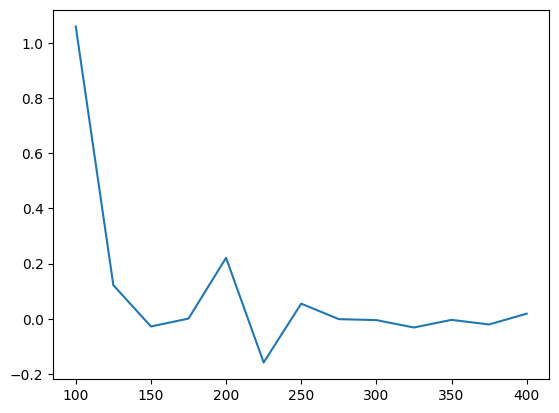

In [6]:
plt.plot(db["n"], db["mean audit"] - db["mean audit true"])

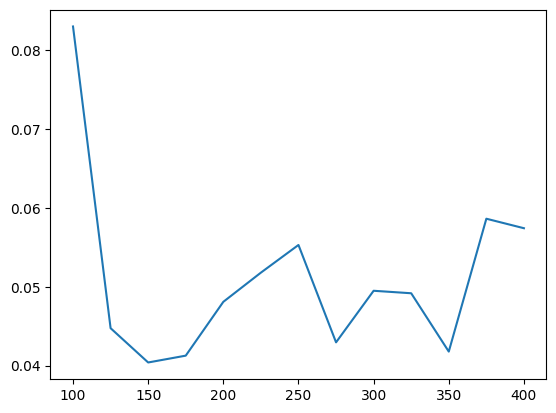

In [7]:
plt.plot(db["n"], db["aat to kstar"])

In [6]:
results = pd.DataFrame(columns=["n", "error"])

In [7]:
results.loc[len(results.index)] = {"n": 10, "error": 3}

In [8]:
results

,n,error
0,10,3
